In [92]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    precision_score, recall_score, f1_score, classification_report)
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from scipy.stats import mannwhitneyu, pearsonr,kruskal
from sklearn.feature_selection import RFE
from scipy.stats import chi2_contingency

In [3]:
base_path = Path.cwd().parent
raw_data_path = base_path/"data"/"raw"
dt1 = pd.read_csv(f"{raw_data_path}/diabetes_012_health_indicators_BRFSS2015.csv")
dt2 = pd.read_csv(f"{raw_data_path}/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
dt3 = pd.read_csv(f"{raw_data_path}/diabetes_binary_health_indicators_BRFSS2015.csv")

In [5]:
dt1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
dt1[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits','Veggies','HvyAlcoholConsump']].head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [9]:
dt1[['AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']].head(5)

,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
dt1.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [15]:
dt1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


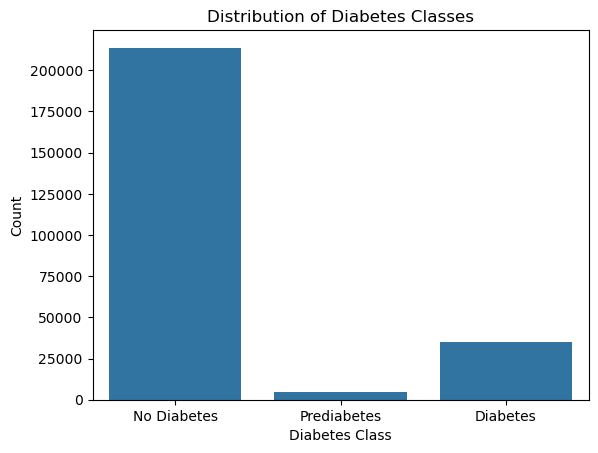

In [17]:
sns.countplot(x='Diabetes_012', data=dt1)
plt.title('Distribution of Diabetes Classes')
plt.xticks([0, 1, 2], ['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.xlabel('Diabetes Class')
plt.ylabel('Count')
plt.show()

- The diabetes cass is impbalanced and the majority of the patients in the dataset have no diabetes.

In [20]:
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                   'NoDocbcCost', 'DiffWalk', 'Sex']
int_features = ['BMI', 'MentHlth', 'PhysHlth']
categorical_features = ['GenHlth', 'Age', 'Education', 'Income']

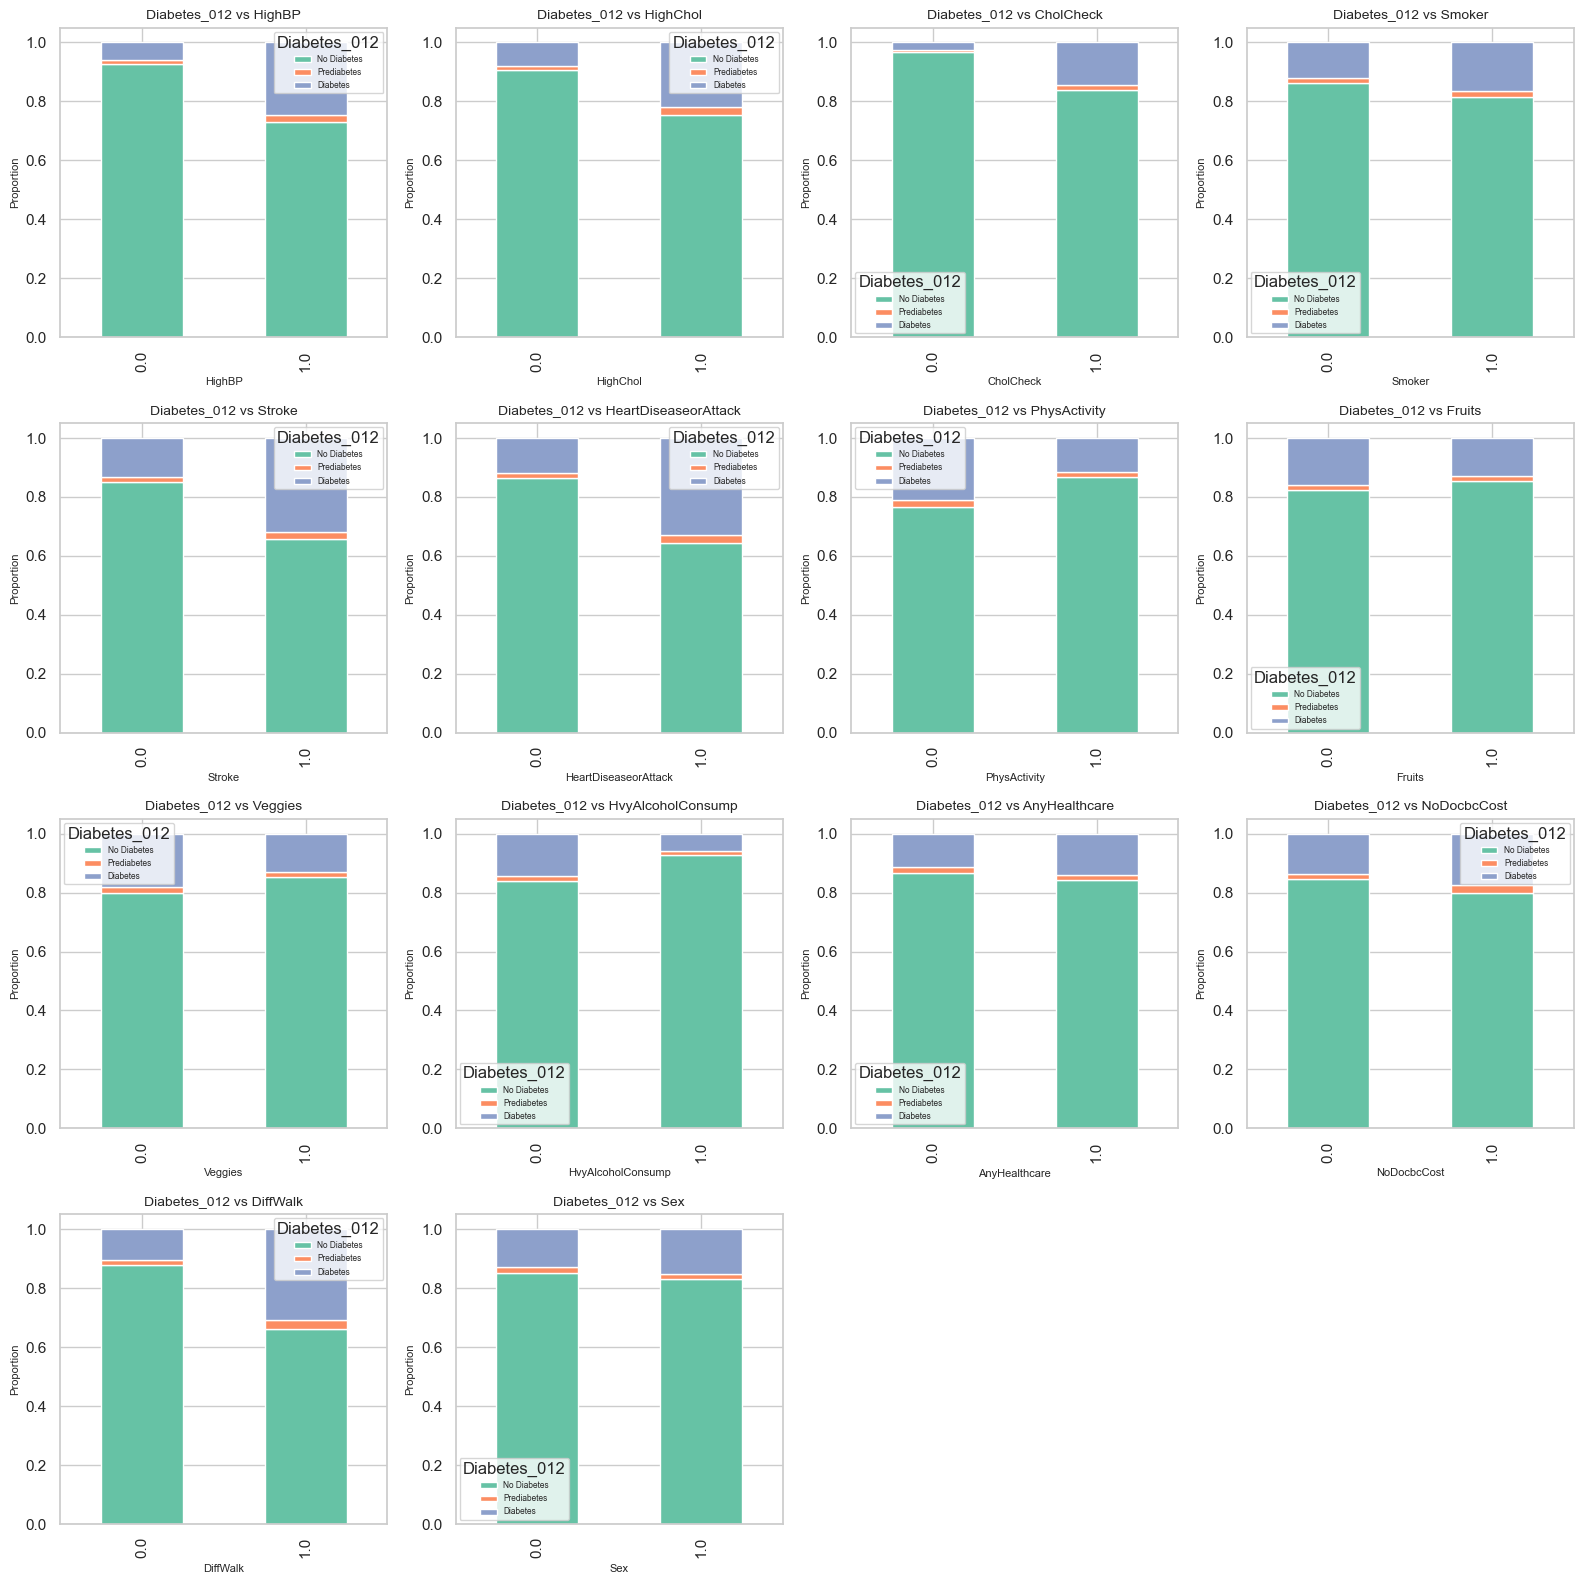

In [22]:
sns.set(style="whitegrid")
fig1, axes1 = plt.subplots(4, 4, figsize=(16, 16))
axes1 = axes1.flatten()

for idx, feature in enumerate(binary_features):
    proportions = pd.crosstab(dt1[feature], dt1['Diabetes_012'], normalize='index')
    proportions.plot(kind='bar', stacked=True, ax=axes1[idx], color=sns.color_palette('Set2', 3))
    axes1[idx].set_title(f'Diabetes_012 vs {feature}', fontsize=10)
    axes1[idx].set_xlabel(feature, fontsize=8)
    axes1[idx].set_ylabel('Proportion', fontsize=8)
    axes1[idx].legend(title='Diabetes_012', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], fontsize=6)
for i in range(len(binary_features), len(axes1)):
    axes1[i].axis('off')

plt.tight_layout()
plt.show()

1. HighBP, HighChol, Cholcheck, Smoker, Stroke, HeartDisease/attack, not being pyysically active (PhysActivity = 0), Diffwalk are associated with higher probability of being diabetes. 
2. Interestingly high alchohol consumption is associated with a lower risk of diabetes
3. Overall, healthy life style (i.e., doing physicall activity and eating healthy food (vegie/fruit)) is associated with lower risk of diabetes
4. Overall, having access to healthcare and being visited by a doctor(Anyhealthcare and NoDOCbcCost = 0) is associated with lower risk of diabetes
5. Sex seems to be irerelevant 

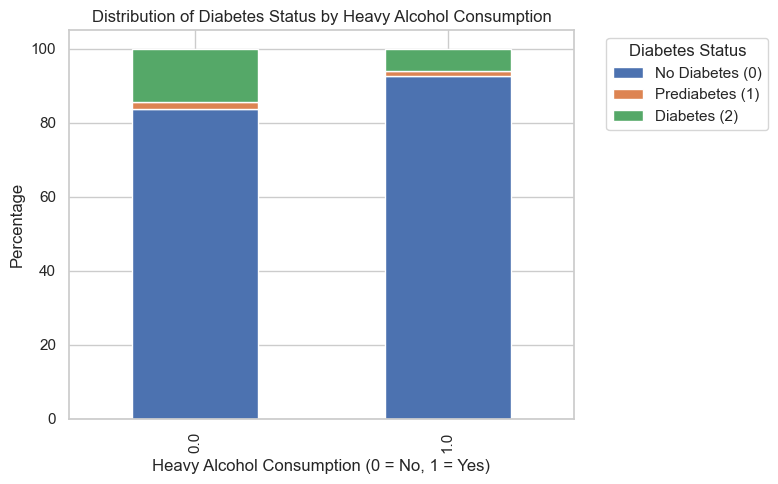

In [24]:
ct = pd.crosstab(dt1['HvyAlcoholConsump'], dt1['Diabetes_012'], normalize='index') * 100
ct.columns = ['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)']

# Plot
ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribution of Diabetes Status by Heavy Alcohol Consumption')
plt.xlabel('Heavy Alcohol Consumption (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.legend(title='Diabetes Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [58]:
dt1['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

In [110]:
# Doesn't make sense -- > Chi square test to make sure the difference is not significant and is caused by the low number of heavy alchohol comsumers
contingency = pd.crosstab(dt1['HvyAlcoholConsump'], dt1['Diabetes_012'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test statistic:", chi2)
print("p-value:", p)

Chi-square test statistic: 850.3240478355594
p-value: 2.2619296719502035e-185


There could be a few explanations for this like reverse causality (people who got diabete reducded their level of alcohol comsumption -time series data could help) or the existence of confounders (like age, younder people might tend to consume alcohol more heavily etc)

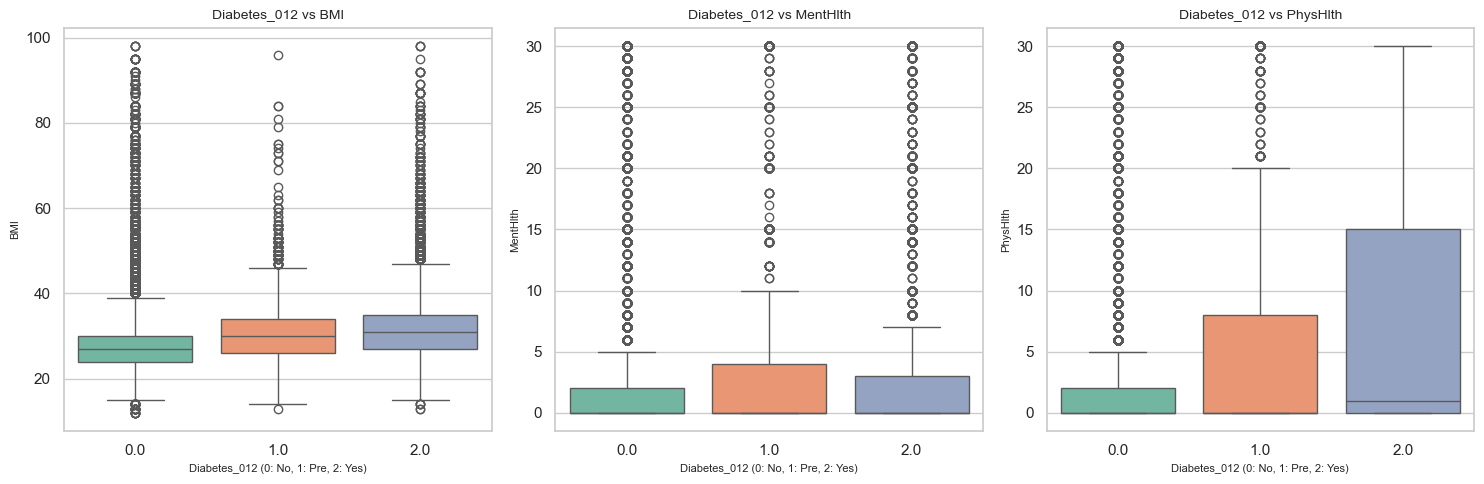

In [25]:
sns.set(style="whitegrid")
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))
axes2 = axes2.flatten()

for idx, feature in enumerate(int_features):
    sns.boxplot(x='Diabetes_012', y=feature, data=dt1, ax=axes2[idx], palette='Set2')
    axes2[idx].set_title(f'Diabetes_012 vs {feature}', fontsize=10)
    axes2[idx].set_xlabel('Diabetes_012 (0: No, 1: Pre, 2: Yes)', fontsize=8)
    axes2[idx].set_ylabel(feature, fontsize=8)

plt.tight_layout()
plt.show()

1. The increasing trend in median BMI indicates that higher BMI is associated with higher probability of diabetes. This is even noticable when comparing prediabetes with no diabetes. Interestingly, there are extereme outliers in almost all three groups so we have non-diabetic people with very high BMI (even higher than the median BMI for diabetic people) and vice versa.
2. generally speaking people with better mental health have a lower chance of being diabetic. Further analysis is needed to verify that.
3.  There is a clear relationship between PhysHlth and diabetes. People with diabetes/prediabetes had a significanlty higher number of dayswith poor physical health. 

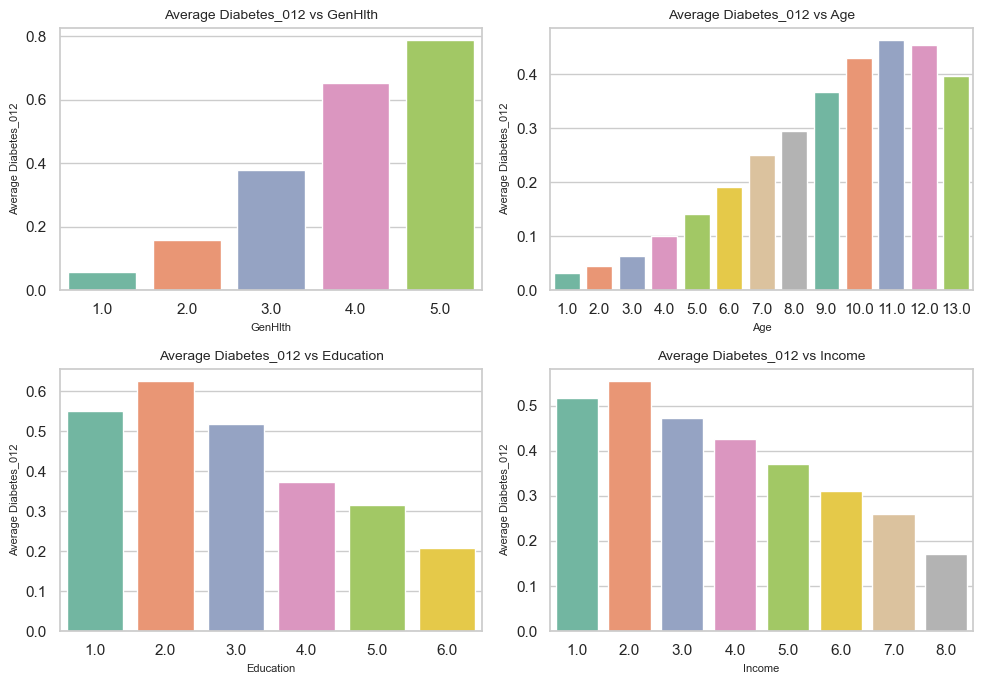

In [27]:
fig3, axes3 = plt.subplots(2, 2, figsize=(10, 7))
axes3 = axes3.flatten()

for idx, feature in enumerate(categorical_features):
    avg_diabetes = dt1.groupby(feature)['Diabetes_012'].mean()
    sns.barplot(x=avg_diabetes.index, y=avg_diabetes.values, ax=axes3[idx], palette='Set2')
    axes3[idx].set_title(f'Average Diabetes_012 vs {feature}', fontsize=10)
    axes3[idx].set_xlabel(feature, fontsize=8)
    axes3[idx].set_ylabel('Average Diabetes_012', fontsize=8)

plt.tight_layout()
plt.show()

1. Clear relationship between reported general health and diabetes. People who rate their general health poorly are very likely to have prediabetes or diabetes.
2. Overall, there is a positive relationship between age and risk of diabetes. This is true up to age group 11. Interestingly, the risk of diabetes sightly reduces in very elderly groups (groups 12 and 13
3. Higher education is generally associated with lower risk of diabetes as higher education may be linked to better lifestyle (no smoke, fruit, better access to healthcare etc. This can be further investigated using the current data.
4. Same thing is true for income and diabetes. Higher income is associated with lower risk of diabetes

<Figure size 1200x600 with 0 Axes>

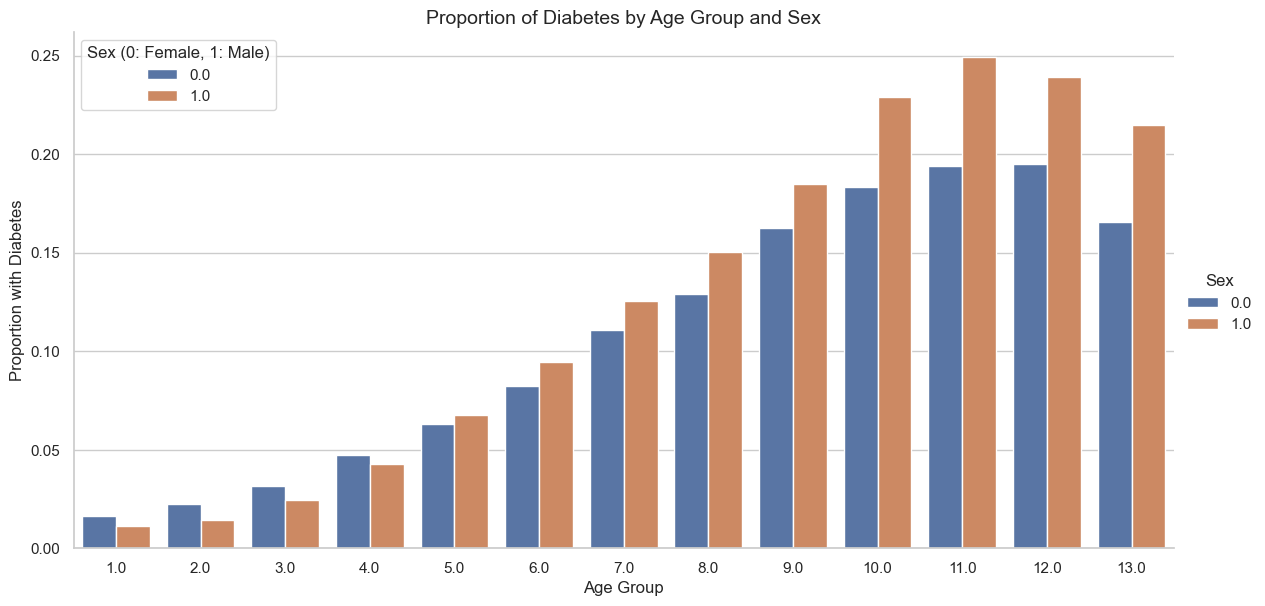

In [29]:
dt1['Has_Diabetes'] = dt1['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)
plt.figure(figsize=(12, 6))
sns.catplot(x='Age', y='Has_Diabetes', hue='Sex', kind='bar', data=dt1, height=6, aspect=2, errorbar=None)
plt.title('Proportion of Diabetes by Age Group and Sex', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Proportion with Diabetes', fontsize=12)
plt.legend(title='Sex (0: Female, 1: Male)', loc='upper left')
plt.show()

Overall, men show a higher proportion of diabetes than women and the difference between the proportion of diabetes increases as age group increases.

## 2. Using an appropriate statistical method, identify the risk factors associated with having diabetes based on the data.

In [24]:
x = dt3.drop(columns=['Diabetes_binary'])

<Axes: >

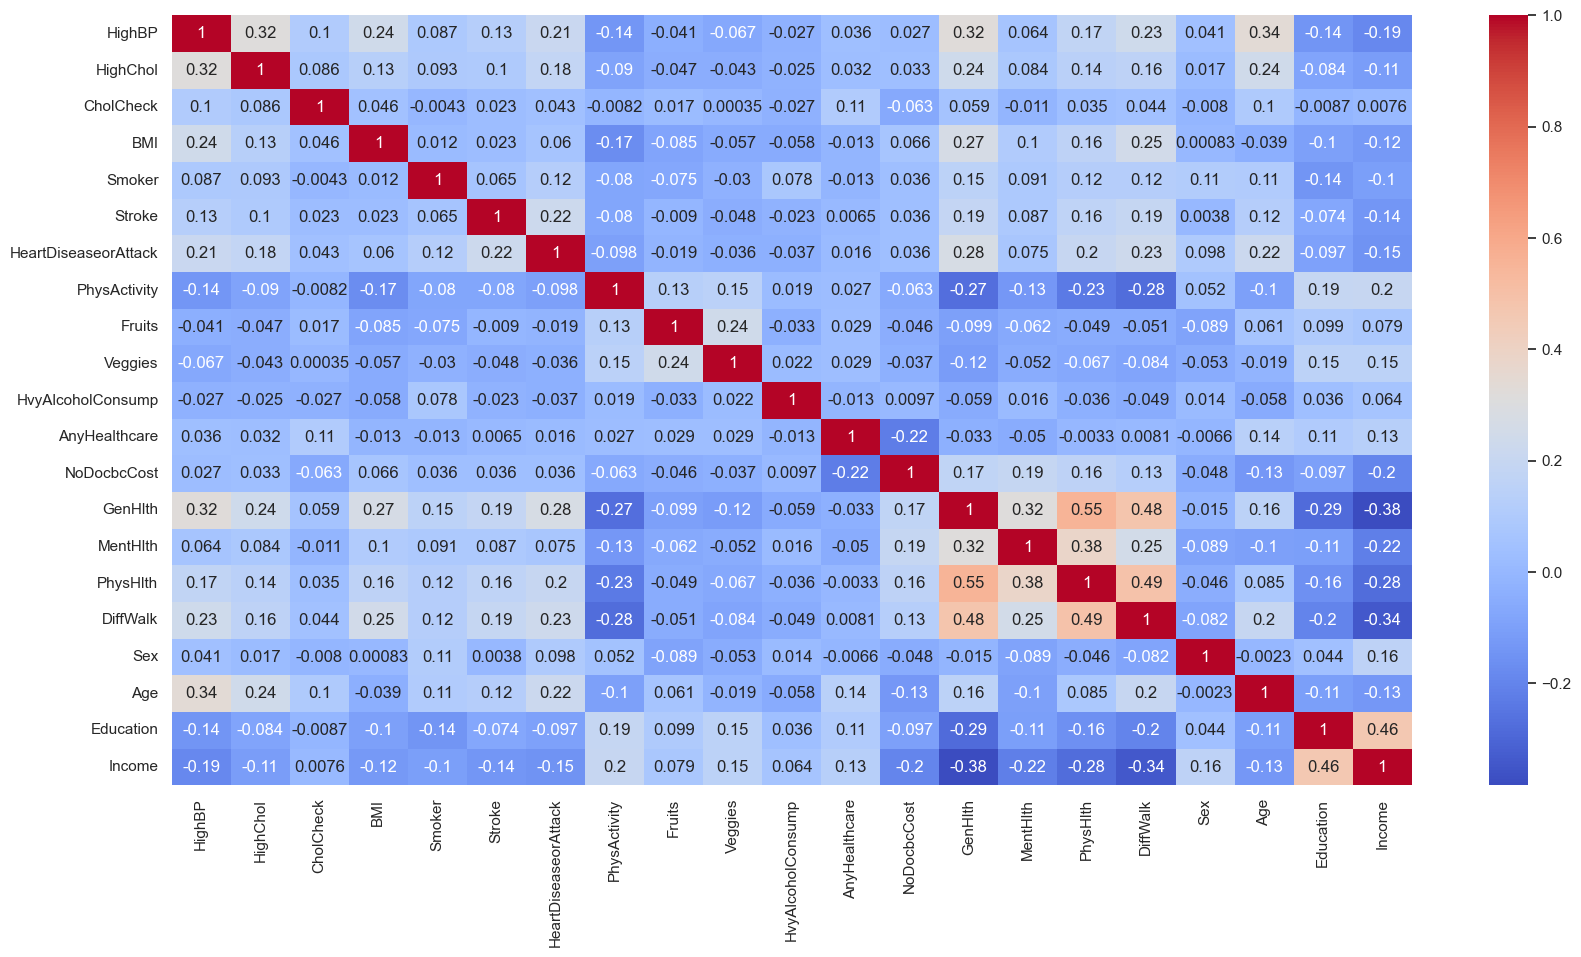

In [26]:
plt.figure(figsize = (20,10))
sns.heatmap(dt2.drop(columns=['Diabetes_binary']).corr(),annot=True , cmap ='coolwarm' )

High positive correaltion between (genhlth,Diffwalk) , (genhlth,Physhlth), (diffwalk,Physhlth), (education,income). 

**Stroke, HeartDiseaseorAttack, DiffWalk, PhysHlth and GenHlth are more likely consequences of diabetes**

In [29]:
x = dt3.drop(columns=['Diabetes_binary','Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'PhysHlth' , 'GenHlth', 'Education',
                     'HvyAlcoholConsump'])

In [30]:
# chk for multicolinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
2,CholCheck,21.604206
8,AnyHealthcare,19.588541
3,BMI,15.551482
13,Income,10.624804
12,Age,9.332784
7,Veggies,5.727669
5,PhysActivity,4.373145
6,Fruits,3.013221
0,HighBP,2.232073
1,HighChol,2.005221


In [31]:
# chk for multicolinearity
# dt3['CholCheckupwithHltcare'] = dt3['CholCheck'] + dt3['AnyHealthcare']
x = dt3.drop(columns=['Diabetes_binary','Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'PhysHlth' , 'GenHlth','CholCheck',
                    'AnyHealthcare','Education','HvyAlcoholConsump'])
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
2,BMI,11.378593
11,Income,8.997020
10,Age,7.875189
6,Veggies,5.641394
4,PhysActivity,4.229707
5,Fruits,2.996669
0,HighBP,2.230295
1,HighChol,2.003172
9,Sex,1.882846
3,Smoker,1.871059


In [32]:
binary_features = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'NoDocbcCost', 'Sex']
int_features = ['BMI', 'MentHlth']
categorical_features = ['Age','Income']

In [33]:
X_cat = dt3[categorical_features + binary_features]
y = dt3['Diabetes_binary']
X_cat_scaled = MinMaxScaler().fit_transform(X_cat)
selector_cat = SelectKBest(score_func=chi2, k='all')
selector_cat.fit(X_cat_scaled, y)
cat_scores = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2 Score': selector_cat.scores_}).sort_values(by='Chi2 Score', ascending=False)
X_cont = dt3[int_features]
selector_cont = SelectKBest(score_func=f_classif, k='all')
selector_cont.fit(X_cont, y)
cont_scores = pd.DataFrame({
    'Feature': X_cont.columns,
    'F Score': selector_cont.scores_}).sort_values(by='F Score', ascending=False)

print("top categorical-binary features:")
print(cat_scores)
print("\ntop other features:")
print(cont_scores)

top categorical-binary features:
        Feature    Chi2 Score
2        HighBP  10029.013935
3      HighChol   5859.710582
0           Age    882.937629
5  PhysActivity    861.887532
1        Income    826.497477
4        Smoker    521.978858
8   NoDocbcCost    229.542412
6        Fruits    154.291404
7       Veggies    153.169215
9           Sex    140.248274

top other features:
    Feature       F Score
0       BMI  12516.718642
1  MentHlth   1224.700591


In [35]:
selected_features = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'NoDocbcCost', 'Sex',
                    'BMI', 'MentHlth','Age','Income']

In [37]:
X = dt3[selected_features]
y = dt3['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=91, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_sm = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())
odds_ratios = pd.DataFrame({"Feature": ['Intercept'] + selected_features,"Odds Ratio": np.exp(result.params)})
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.334444
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               177576
Model:                          Logit   Df Residuals:                   177563
Method:                           MLE   Df Model:                           12
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                  0.1717
Time:                        16:10:01   Log-Likelihood:                -59389.
converged:                       True   LL-Null:                       -71696.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2968      0.010   -233.773      0.000      -2.316      -2.278
x1             0.4650      0.

1. The logistic regression model is statistically significant (LLR p-value < 0.001) and explains 17.1% of the variation in Diabetes target variable. All predictors are statistically significant (p < 0.05), and their directions of impact are consistent with expectations.
2. Key risk factors increasing the odds of diabetes include HighBP (OR = 1.59, 59% increased odds), HighChol (OR = 1.40, 40% increased odds), Age (OR = 1.56 per category, 56% increased odds per category), and BMI (OR = 1.60 per unit, 60% increased odds per unit).
3. Protective factors decreasing the odds of diabetes include Income (OR = 0.77 per category, 23% decreased odds per category), PhysActivity (OR = 0.91, 9% decreased odds), Fruits (OR = 0.97, 3% decreased odds), and Veggies (OR = 0.98, 2% decreased odds).

### 3. Create a study to check whether individuals with a higher BMI are more likely to have diabetes (including both diabetes and pre-diabetes classifications). Use proper methods to measure statistical significance.

1. H0: No difference in BMI between diabetes/pre-diabetes and those without
2. H1: diabetes/pre-diabetes have a higher avg BMI

In [42]:
bmi_diabetic = dt3[dt3['Diabetes_binary'] == 1]['BMI']
bmi_nodiabetic = dt3[dt3['Diabetes_binary'] == 0]['BMI']

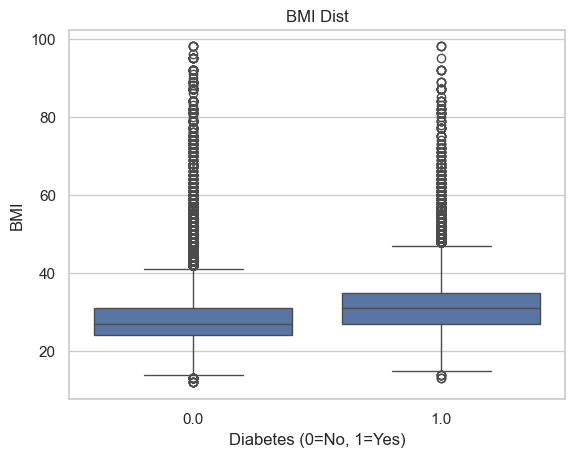

In [43]:
sns.boxplot(x='Diabetes_binary', y='BMI', data=dt3)
plt.title('BMI Dist')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

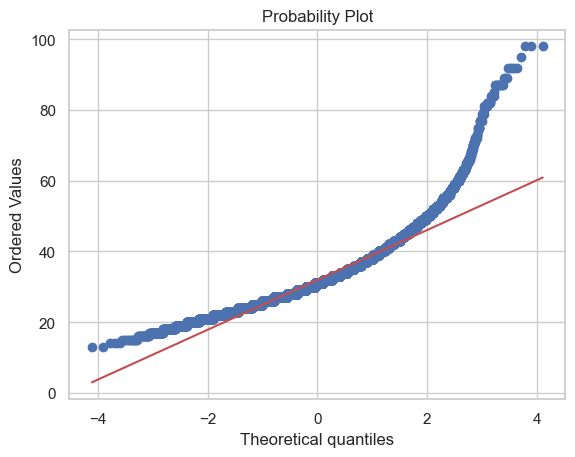

In [44]:
import scipy.stats as stats
stats.probplot(dt3[dt3['Diabetes_binary'] == 1]['BMI'], dist="norm", plot=plt)
plt.show()

BMI is not normaly distributed

In [46]:
bmi_no = dt3[dt3['Diabetes_binary'] == 0]['BMI']
bmi_yes = dt3[dt3['Diabetes_binary'] == 1]['BMI']
u_stat, p_val = mannwhitneyu(bmi_yes, bmi_no, alternative='greater')
print(f"U-stat: {u_stat}")
print(f"P-val: {p_val:.4e}")

U-stat: 5311898347.5
P-val: 0.0000e+00


the u-stat and p-val indicate a statistically significant difference in BMI distributions. Therefore, using only mannwhitneyu we reject the H0 and conclude that individual with diabet/pre-diabetes have higher BMI

## Confirming results further with LR

Possoible Mediators: 
1. Stroke : BMI-->Diabetes-->Stroke (stroke is more likely a conequence of BMI/Diabetes rather than a cause of both)
2. HeartDiseaseorAttack: Same as stroke
3. DiffWalk/PhysHlth/GenHlth: Probably a consequence of high BMI/Diabetes

Potential Confounders: 
<br>[HighBP,HighChol,MentHlth,PhysActivity,Age,Education,Income,Smoker,Sex,Fruits,Veggies]

In [52]:
predictors = ['HighBP','HighChol','MentHlth','PhysActivity','Age','Education','Income','Smoker','Sex','Fruits','Veggies']
y = dt3['Diabetes_binary']
for pred in predictors:
    X_univariate = sm.add_constant(dt3[[pred]], prepend=True)
    model_univariate = sm.Logit(y, X_univariate)
    result_univariate = model_univariate.fit(disp=0)
    print(f"P-value for {pred}: {result_univariate.pvalues[pred]:.2f}")

P-value for HighBP: 0.00
P-value for HighChol: 0.00
P-value for MentHlth: 0.00
P-value for PhysActivity: 0.00
P-value for Age: 0.00
P-value for Education: 0.00
P-value for Income: 0.00
P-value for Smoker: 0.00
P-value for Sex: 0.00
P-value for Fruits: 0.00
P-value for Veggies: 0.00


In [58]:
binary_features = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies','Sex']
int_features = ['MentHlth']  
categorical_features = [ 'Age', 'Education', 'Income']
for feature in binary_features:
    bmi_group0 = dt3[dt3[feature] == 0]['BMI']
    bmi_group1 = dt3[dt3[feature] == 1]['BMI']
    u_stat, p_value = mannwhitneyu(bmi_group0, bmi_group1, alternative='two-sided')
    print(f"MWU test P-value for {feature} vs. BMI:: {p_value:.2f}")

for feature in int_features:
    corr, p_value = pearsonr(dt3[feature], dt3['BMI'])
    print(f"Correlation for {feature} vs. BMI: {corr:.3f}, P-value: {p_value:.3f}")

for feature in categorical_features:
    groups = [dt3[dt3[feature] == level]['BMI'] for level in dt3[feature].unique()]
    stat, p_value = kruskal(*groups)
    print(f"KW test P-value for {feature} vs. BMI: {p_value:.3f}")

MWU test P-value for HighBP vs. BMI:: 0.00
MWU test P-value for HighChol vs. BMI:: 0.00
MWU test P-value for Smoker vs. BMI:: 0.00
MWU test P-value for PhysActivity vs. BMI:: 0.00
MWU test P-value for Fruits vs. BMI:: 0.00
MWU test P-value for Veggies vs. BMI:: 0.00
MWU test P-value for Sex vs. BMI:: 0.00
Correlation for MentHlth vs. BMI: 0.085, P-value: 0.000
KW test P-value for Age vs. BMI: 0.000
KW test P-value for Education vs. BMI: 0.000
KW test P-value for Income vs. BMI: 0.000


In [59]:
y = dt3['Diabetes_binary']
features_to_test = ['HighBP','HighChol','MentHlth','PhysActivity','Age','Education','Income','Smoker','Sex','Fruits','Veggies']
X_bmi = sm.add_constant(dt3[['BMI']], prepend=True)
model_bmi = sm.Logit(y, X_bmi)
result_bmi = model_bmi.fit(disp=0)
beta_bmi_only = result_bmi.params['BMI']
for feature in features_to_test:
    X_bmi_feature = sm.add_constant(dt3[['BMI', feature]], prepend=True)
    model_bmi_feature = sm.Logit(y, X_bmi_feature)
    result_bmi_feature = model_bmi_feature.fit(disp=0)
    beta_bmi_feature = result_bmi_feature.params['BMI']
    change = abs(beta_bmi_only - beta_bmi_feature) / abs(beta_bmi_only) * 100
    print(f"Change in BMI coefficient due to {feature}: {change:.1f}%")

Change in BMI coefficient due to HighBP: 19.8%
Change in BMI coefficient due to HighChol: 4.2%
Change in BMI coefficient due to MentHlth: 2.6%
Change in BMI coefficient due to PhysActivity: 6.8%
Change in BMI coefficient due to Age: 16.8%
Change in BMI coefficient due to Education: 4.6%
Change in BMI coefficient due to Income: 7.3%
Change in BMI coefficient due to Smoker: 0.1%
Change in BMI coefficient due to Sex: 0.3%
Change in BMI coefficient due to Fruits: 1.1%
Change in BMI coefficient due to Veggies: 1.3%


In [65]:
X_vif = dt3[['BMI','HighBP','HighChol','MentHlth','PhysActivity','Age','Education','Income','Smoker','Sex','Fruits','Veggies']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data

,Variable,VIF
0,BMI,13.433889
1,HighBP,2.242834
2,HighChol,2.002790
3,MentHlth,1.264791
4,PhysActivity,4.446116
5,Age,8.331296
6,Education,25.601464
7,Income,12.797984
8,Smoker,1.867071
9,Sex,1.883530


In [67]:
X_vif = dt3[['BMI','HighBP','HighChol','MentHlth','PhysActivity','Age','Income','Smoker','Sex','Fruits','Veggies']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data

,Variable,VIF
0,BMI,11.064329
1,HighBP,2.230289
2,HighChol,2.002662
3,MentHlth,1.249135
4,PhysActivity,4.226523
5,Age,7.834055
6,Income,8.875587
7,Smoker,1.866488
8,Sex,1.882652
9,Fruits,2.996504


In [71]:
X_vif_m = dt3[['BMI','HighBP','HighChol','MentHlth','PhysActivity','Age','Income','Smoker','Sex','Fruits','Veggies']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data

,Variable,VIF
0,BMI,11.064329
1,HighBP,2.230289
2,HighChol,2.002662
3,MentHlth,1.249135
4,PhysActivity,4.226523
5,Age,7.834055
6,Income,8.875587
7,Smoker,1.866488
8,Sex,1.882652
9,Fruits,2.996504


In [74]:
x = dt3[['BMI','HighBP','HighChol','MentHlth','PhysActivity','Age','Income','Smoker','Sex','Fruits','Veggies']]
y = dt3['Diabetes_binary']
x = sm.add_constant(x)
logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())
odds_ratios = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logit_model.params,
    'Odds Ratio': np.exp(logit_model.params),
    'P-Value': logit_model.pvalues})
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.334876
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253668
Method:                           MLE   Df Model:                           11
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                  0.1706
Time:                        16:10:51   Log-Likelihood:                -84951.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.2602      0.048   -109.442      0.000      -5.354      -5.166
BMI              0.0698

After controlling for all potential confounders, BMI is still a significant vairable. 
<br>Overall conclusion from WMU and logistic regression : BMI is a significant indicator of diabetes

# 4. Create a study to check whether individuals with a higher BMI are more likely to have diabetes but now after controlling for smoking status and physical activity (i.e., removing the effect of those variables). Use proper methods to measure statistical significance.

In [25]:
x = dt3[['BMI', 'Smoker', 'PhysActivity']]
y = dt3['Diabetes_binary']
x = sm.add_constant(x)
logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())
odds_ratios = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logit_model.params,
    'Odds Ratio': np.exp(logit_model.params),
    'P-Value': logit_model.pvalues})
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.378902
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253676
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                 0.06155
Time:                        23:41:28   Log-Likelihood:                -96120.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.7767      0.029   -130.693      0.000      -3.833      -3.720
BMI              0.0737

Even after controlling for smoking and physicall activity, BMI remained statistically significant. The positive coefificent of the BMI indicates that higher BMI is associted with higher risk of diabetes. 

# Reosurces

BMI & Diabetes: Mediators and Confounders 
1. Logue, Jennifer, et al. "Association between BMI measured within a year after diagnosis of type 2 diabetes and mortality." Diabetes care 36.4 (2013): 887-893.
1. Sen, Jaydip, Nitish Mondal, and Sweeta Dutta. "Factors affecting overweight and obesity among urban adults: a cross-sectional study." Epidemiology, Biostatistics, and Public Health 10.1 (2013).
2. Asil, E., Surucuoglu, M. S., Cakiroglu, F. P., Ucar, A., Ozcelik, A. O., Yilmaz, M. V., & Akan, L. S. (2014). Factors that affect body mass index of adults. Pakistan Journal of Nutrition, 13(5), 255.
3. Nonterah, Engelbert Adamwaba, et al. "Socio-demographic and behavioural determinants of body mass index among an adult population in rural Northern Ghana: the AWI-Gen study." Global health action 11.sup2 (2018): 1467588.
   <br>3.1 inverse relationship between age and the likelihood of maintaining a normal body weight within this working-age population suggests a tendency for BMI to increase with age.
   <br>3.2 Found a significant correlation between sex and BMI 
